ChEn-3170: Computational Methods in Chemical Engineering Fall 2020 UMass Lowell; Prof. V. F. de Almeida **10Dec20**

# 18. Continuous Stirred-Tank Reactor w/ Heating 
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\uvar}{\boldsymbol{u}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents <a id="toc"></a>
* [Objectives](#obj)
* [Problem Statement](#ps)
* [Input Data](#data)
* [Total Mass Balance](#mb)
* [Species Mole Balance](#smb)
* [Energy Balance](#eb)
* [Vector ODE System](#vodes)
* [Degrees of Freedom](#dof)
* [Steady-State Concentration of A](#ssa)
* [Steady-State Concentration of B](#ssb)
* [Steady-State Heating Power](#sst)
* [Time Integration Function](#cstrrun)
* [New Inflow Condition Change](#nicc)
* [Final Comments](#fc)
* [Interactive Results](#ires)
---

## [Objectives](#toc)<a id="obj"></a>
+ Introduce the computational notebook approach to problem solving.
+ Combine content, problem setup, computational methods, calculations, and interactive analysis in one *live*, exchangeable, portable (web-based) document.
+ Use chemical reaction engineering methods applied to a chemical reactor problem example: open system, time-dependent, non-isothermal, single, endothermic chemical reaction, and two species.

## [Problem Statement](#toc)<a id="ps"></a>

This problem was provided by Prof. Donatelli (**2018**) while teaching the **Fall ChEn-4130 Process Control** class.

An irreversible first-order **endothermic reaction** 

\begin{equation*}
\text{A} \overset{k}{\longrightarrow} 2\,\text{B}  ,
\end{equation*}

is performed in a continuous-stirred-tank reactor (CSTR; sketch below). A feed stream containing reactant A enters the constant volume CSTR at a mass flow rate $w$, temperature $T_\text{in}$ and molar concentration $c_\text{Ain}$. The product stream leaves the reactor at a mass flow rate $w$, temperature $T$, and molar concentration $c_\text{A}$ for the reactant and $c_\text{B}$ for the product. The heat power addition rate to the CSTR is $\dot{Q}$, and the experimental rate of reaction per unit volume is 

\begin{equation*}
r_1 = k\,c_\text{A}\,c_\text{B}^0  ,
\end{equation*}

where the rate constant is equal to an Arrhenius equation: $k = k_0\,\exp(\frac{-E}{R\,T})$.

   [1.](#smb) Derive a dynamic model for the CSTR to determine the concentrations of reactant A and product B and the CSTR temperature as a function of time.
   
   [2.](#dof) Perform a degrees of freedom analysis. Identify all input and output variables.
   
   [3.](#ssa) Determine (analytically using pencil and paper) the steady-state effluent concentrations for reactant A and product B and the required heating rate in kW for the above conditions and a given steady state temperature, $T_\text{ss}$ (see value below). The heating rate is not given directly. It is to be calculated analytically from the the steady state condition.
   
   [4.](#nicc) Suppose a switch is made to a new feed stream with $c_\text{Ain}$ = 1.0 kgmol/m$^3$ and $T_\text{in}$ = 440 K, and the heat addition rate $\dot{Q}$ remains unchanged. Determine the reactant and product concentrations and the CSTR temperature as a function of time. Tabulate and plot the dynamic results. Analyze the results, providing a plausible explanation based on your engineering knowledge.
   
   [5.](#ires) Added calculation. Compute, interactively, the effect of simultaneous changes in $c_\text{Ain}$ and $T_\text{in}$ for a range of values in the interval 0.5 to 1.5 kgmol/L, and 400 to 450 K, respectively.
 
 ![](images/cstr.png)

## [Input Data](#toc)<a id="data"></a>


|Name                      | Parameter          | Value                | Unit              |
|------------------------- | ------------------ | -------------------- | ----------------- | 
|mass flow rate            | $w$                | 10                   | kg/s              | 
|inflow concentration of A | $c_\text{Ain}$     | 1.2                  | kgmol/$\text{m}^3$| 
|inflow concentration of B | $c_\text{Bin}$     | 0.0                  | kgmol/$\text{m}^3$| 
|inflow temperature        | $T_\text{in}$      | 425                  | K                 | 
|holdup volume             | $V$                | 0.2                  | $\text{m}^3$      | 
|mass density              | $\rho$             | 1000                 | kg/$\text{m}^3$   |
|heat capacity             | $C$                | 4184                 | J/(kg K)          |
|heat of reaction          | $\Delta H_\text{R}$| 6.69 10$^8$          | J/kgmol           |
|Arrhenius frequency       | $k_0$              | $1.97\times 10^{24}$ | $\text{s}^{-1}$   |
|activation temperature    | $E/R$              | 20000                | K                 |
|S.S. reactor temperature  | $T_\text{ss}$      | 350                  | K                 |


Note that this is an endothermic reaction (A → 2B) and the reactor temperature at steady state is lower than the temperature of the inflow stream.

In [1]:
'''Parameters input'''

w_flow          =   10.0      # kg/s
c_a_in          =   1.2       # kgmol/m^3
c_b_in          =   0.0       # kgmol/m^3
temp_in         =   425.0     # K
volume          =   0.2       # m^3
rho             =   1000.0    # kg/m^3
heat_capacity   =   4184.0    # J/kg/K
enthalpy_rxn    =   6.69e8    # J/kgmol
k_0             =   1.97e24   # 1/s
energy_a_over_r =   20000.0   # K
temp_ss         =   350.0     # K

In [2]:
'''Parameters input dictionary'''

params = dict()

params['w_flow']          =   w_flow
params['c_a_in']          =   c_a_in
params['c_b_in']          =   c_b_in
params['temp_in']         =   temp_in
params['volume']          =   volume
params['rho']             =   rho
params['heat_capacity']   =   heat_capacity
params['enthalpy_rxn']    =   enthalpy_rxn
params['k_0']             =   k_0
params['energy_a_over_r'] =   energy_a_over_r
params['temp_ss']         =   temp_ss

## [Total Mass Balance](#toc)<a id="mb"></a>

The volumetric flow rate is a constant because the fluid is incompressible 

\begin{equation*}
q = q_\text{in} = \text{constant} 
\end{equation*}

where $q = \frac{w}{\rho}$.


## [Species Mole Balance](#toc)<a id="smb"></a>

\begin{equation*}
\frac{dc_\text{A}}{dt} = -\frac{1}{\tau}\bigl(c_\text{A}-c_\text{Ain}\bigr) + g_\text{A}(t) ,\\
\frac{dc_\text{B}}{dt} = -\frac{1}{\tau}\bigl(c_\text{B}-c_\text{Bin}\bigr) + g_\text{B}(t) ,
\end{equation*}

where $\tau = \frac{V}{q}$ is the flow residence time in the reactor, $g_\text{A}(t)$ is the species A production rate; similarly for species B, $g_\text{B}(t)$. Note that these equations are the classical relaxation process with a generation term where the relaxation time is the flow residence time $\tau$.

The species production rates are obtained from the stoichiometric relation 

\begin{equation*}
 \gvec = \Smtrx^\top\,\rvec ,
\end{equation*}

for this problem 

\begin{equation*}
\text{A} \overset{k}{\longrightarrow} 2\,\text{B}  ,
\end{equation*}

the stoichiometric relation gives

\begin{equation*}
 \begin{pmatrix}
  -1 & 2 
 \end{pmatrix}^\top
 \,
 \begin{pmatrix}
  k\,c_\text{A}   
 \end{pmatrix} =
  \begin{pmatrix}
  -1 \\ 
  2 
 \end{pmatrix} 
  \begin{pmatrix}
  k\,c_\text{A}   
 \end{pmatrix} = 
 \begin{pmatrix}
 -k\,c_\text{A}  \\ 
  2\,k\,c_\text{A}
\end{pmatrix} =
\begin{pmatrix}
 g_\text{A} \\
 g_\text{B} 
\end{pmatrix}
\end{equation*}

where the reaction rate constant is expressed in the Arrhenius form $k = k_0\,e^{\frac{-E}{R\,T}}$.

In [3]:
'''Stoichiometric matrix'''

# (A → 2B)
import numpy as np

stoic_mtrx = np.zeros((1,2)) # stoichiometric matrix
stoic_mtrx[0,0] = -1.0
stoic_mtrx[0,1] =  2.0

params['stoic_mtrx'] = stoic_mtrx

# verify mass conservation
import numpy.linalg
assert numpy.linalg.matrix_rank(stoic_mtrx) < stoic_mtrx.shape[1]

## [Energy Balance](#toc)<a id="eb"></a>

\begin{equation*}
\frac{dT}{dt} = -\frac{1}{\tau}\,\bigl(T-T_\text{in}\bigr) 
                + \frac{1}{\rho C} \Bigl(\frac{\dot{Q}}{V} - \Delta H_\text{R}\,r_1 \Bigr)
\end{equation*}

where $r_1 = k\,c_\text{A}$ is the reaction rate. Note that $\frac{\dot{Q}}{V}$ is the power density of heating or cooling. Likewise $\Delta H_\text{R}\,r_1$ is the power density of chemical reaction heating or cooling. Here again, this is a classical relaxation model with relaxation time equal to the residence time $\tau$ in the presence of a generation term which is a combination of the external heating/cooling power and the chemical reaction heating/cooling power.

## [Degrees of Freedom](#toc)<a id="dof"></a>
There exists three equations (below), the total mass balance forces the volumetric flow rate to be a constant because the flow is incompressible, therefore $q$ must be specified. There exists three unknowns, namely the molarity of species A, $c_\text{A}(t)$, and B, $c_\text{B}(t)$, and the temperature of the reactor, $T(t)$. Therefore there are as many unknowns as there are equations and the problem is potentially solvable given the initial conditions for the unknowns, and all the values of the parameters in the foregoing input data table.

## [Vector ODE System](#toc)<a id="vodes"></a>

A vector notation for the foregoing system of equations greatly improves the generality of the derived computer code. First, the usage of the stoichiometric matrix is instrumental for the case with multiple chemical reactions, where the reaction rates can be related to the species production rates that appear as sources in the species mass balances

Towards this goal define

\begin{equation*}
\frac{d\uvar}{dt} = \fvar( \uvar, t )
\end{equation*}

where $\uvar(t) = (u_1,u_2,u_3)$ and assign 

\begin{align*}
 u_1(t)&=c_\text{A}(t),\\
 u_2(t)&=c_\text{B}(t),\\
 u_3(t)&=T .
\end{align*}

Also for $\fvar(\uvar,t) = \bigl(f_1(\uvar,t), f_2(\uvar,t), f_3(\uvar,t)\bigr)$ assign 

\begin{align*}
 f_1 & = - \frac{1}{\tau}\,(u_1-c_\text{Ain}) + g_\text{A}, \\
 f_2 & = - \frac{1}{\tau}\,(u_2-c_\text{Bin}) + g_\text{B}, \\
 f_3 & = - \frac{1}{\tau}\,(u_3-T_\text{in}) 
         + \frac{1}{\rho C} \Bigl( \frac{\dot{Q}}{V} - \Delta H_\text{R}\,r_1 \Bigr) .
\end{align*}

Finally, the initial conditions given are as follows:

\begin{align*}
 u_1(0)&=c_\text{A}(0) &=c_{A_\text{ss}} ,\\
 u_2(0)&=c_\text{B}(0) &=c_{B_\text{ss}},\\
 u_3(0)&=T(0)          &=T_\text{ss}&.
\end{align*}


In [4]:
'''ODE RHS function for integrator'''

def f_vec(u_vec, t, params):
    
    c_a  = u_vec[0]
    c_b  = u_vec[1]
    temp = u_vec[2]
    
    # sanity check
    assert c_a  >= 0.0
    assert c_b  >= 0.0
    assert temp >= 0.0
      
    c_a_in          = params['c_a_in'] 
    c_b_in          = params['c_b_in']
    temp_in         = params['temp_in']
    volume          = params['volume']
    rho             = params['rho']
    heat_capacity   = params['heat_capacity']
    enthalpy_rxn    = params['enthalpy_rxn']
    k_0             = params['k_0']
    energy_a_over_r = params['energy_a_over_r']
    
    stoic_mtrx      = params['stoic_mtrx']
    q_flow          = params['q_flow']
    q_dot           = params['q_dot']
    
    import math 
    k = k_0 * math.exp(-energy_a_over_r/temp) # reaction rate constant
    
    import numpy as np
    r_vec = np.zeros(1)
    r_vec[0] = k * c_a   # reaction rate vector
    
    g_vec = stoic_mtrx.transpose() @ r_vec  # species production rates S^T r = g
    
    tau = volume/q_flow # flow residence time
    
    f_0 = - 1/tau*(c_a - c_a_in) + g_vec[0]
    
    f_1 = - 1/tau*(c_b - c_b_in) + g_vec[1]
    
    f_2 = - 1/tau*(temp - temp_in) \
          + 1/rho/heat_capacity*( q_dot/volume - enthalpy_rxn * r_vec[0] )
    
    return np.array([f_0, f_1, f_2])

## [Steady-State Concentration of A](#toc)<a id="ssa"></a>

From the species mole balance for A, set the rate of change of $d_{t=\infty}c_\text{A}$ to zero 

\begin{equation*}
0= -\frac{1}{\tau}\bigl(c_\text{A}(\infty)-c_\text{Ain}\bigr)  -k\,c_\text{A}(\infty)
\end{equation*}

to get 

\begin{equation*}
  c_\text{A}(\infty) = c_{\text{A}_\text{ss}} = \frac{c_\text{Ain}}{\tau\,k + 1} .
\end{equation*}

In [5]:
'''Steady state concentration of A'''

import math

q_flow = w_flow/rho

tau = volume / q_flow

k_cte = k_0 * math.exp( -energy_a_over_r/temp_ss )

c_a_ss = c_a_in / (tau*k_cte + 1)

params['c_a_ss'] = c_a_ss  # save s.s. value in params
params['q_flow'] = q_flow  # save s.s. value in params

print('q (vol. flowrate)         = %5.2e [m^3/s] = %5.2e [L/s]'%(q_flow,q_flow*1000))
print('')
print('c_A(S.S.)                 = %5.2e [kgmol/m^3]'%c_a_ss)
print('flow residence time (tau) = %5.2e [s]'%(tau))

q (vol. flowrate)         = 1.00e-02 [m^3/s] = 1.00e+01 [L/s]

c_A(S.S.)                 = 1.71e-01 [kgmol/m^3]
flow residence time (tau) = 2.00e+01 [s]


## [Steady-State Concentration of B](#toc)<a id="ssb"></a>

From the species mole balance for B, set the rate of change of $d_{t=\infty}\,c_\text{B}$ to zero


\begin{equation*}
0= -\frac{1}{\tau}\bigl(c_\text{B}(\infty)-c_\text{Bin}\bigr) + 2k\,c_\text{A}(\infty)  \\
\end{equation*}

to get

\begin{equation*}
 c_\text{B}(\infty) = c_{\text{B}_\text{ss}}  = c_\text{Bin} + \tau\,2\,k\,c_\text{A}(\infty) .
\end{equation*}

In [6]:
'''Steady state concentration of B'''

c_b_ss = c_b_in + tau * 2 * k_cte * c_a_ss

params['c_b_ss'] = c_b_ss # save s.s. value in params

print('c_B(S.S.) = %5.2e [kgmol/m^3]'%c_b_ss)

c_B(S.S.) = 2.06e+00 [kgmol/m^3]


## [Steady-State Heating Power](#toc)<a id="sst"></a>

From the energy balance and $d_{t=\infty}T = 0$, $T_\text{ss} = T(\infty)$ 

\begin{equation*}
0 = -\frac{1}{\tau}\,\bigl(T_\text{ss} -T_\text{in}\bigr) 
                + \frac{1}{\rho C} \Bigl(\frac{\dot{Q}}{V} - \Delta H_\text{R}\,r_1 \Bigr)
\end{equation*}

or

\begin{equation*}
\frac{\dot{Q}_\text{ss} }{V} = \frac{\rho C}{\tau} \bigl(T_\text{ss} - T_\text{in}\bigr) + \Delta H_\text{R}\,k\,c_\text{A}(\infty) .
\end{equation*}

In [7]:
'''Steady state heating power'''

q_heat_power_dens_ss = rho*heat_capacity/tau * (temp_ss - temp_in) + enthalpy_rxn * k_cte * c_a_ss

params['q_dot'] = q_heat_power_dens_ss * volume # save s.s. value in params

print('Q(S.S.) = %5.3e [kW] = %5.3e [MW]'%(q_heat_power_dens_ss*volume/1000, q_heat_power_dens_ss*volume/1000000))

Q(S.S.) = 3.744e+03 [kW] = 3.744e+00 [MW]


**This is a lot of heat!** Since the heat source is positive, heat is provided to the system to keep the reactor temperature from dropping too far below the inflow temperature. 

<span style="color:red">
If the cost of electricity is US $\$$0.3/kWh, to run this chemical reactor for 1 hour will cost: US $1,123 dollars.
</span>

In [8]:
'''Steady state endothermic power'''

print('deltaHrxn_r1 = %5.3e [MW]'%(-enthalpy_rxn * k_cte * c_a_ss * volume/1000000))

deltaHrxn_r1 = -6.882e+00 [MW]


In [9]:
'''Steady state flow-through energy'''

print('-rhoC/tau*(Tss-Tin) = %5.3e [MW]'%(-rho*heat_capacity/tau * (temp_ss - temp_in)/1000000))

-rhoC/tau*(Tss-Tin) = 1.569e+01 [MW]


## [Time Integration Function](#toc)<a id="cstrrun"></a>

In [10]:
'''Create the CSTR run function'''

def run_cstr(f_vec, time_stamps, params):
    
    # ODE integrator
    from scipy.integrate import odeint
    
    max_n_steps_per_time_step = 100 # max number of nonlinear algebraic solver iterations per time step

    u_vec_0 = np.zeros(3,dtype=np.float64)
    
    u_vec_0[0] = params['c_a_ss']
    u_vec_0[1] = params['c_b_ss']
    u_vec_0[2] = params['temp_ss']

    # ODE integrator call
    (u_vec_history, info_dict) = odeint(f_vec, u_vec_0, time_stamps,
                                        args=( params, ),
                                        rtol=1e-7, atol=1e-7, mxstep=max_n_steps_per_time_step,
                                        full_output=True, tfirst=False )

    assert info_dict['message']=='Integration successful.',\
               'Fatal: scipy.integrate.odeint failed %r'%info_dict['message']
    
    return u_vec_history

## [New Inflow Condition Change](#toc) <a id="nicc"></a>

In [11]:
'''Evolve the CSTR'''

# inflow condition change

params['c_a_in']  = 1.0    # 1 mol/L
params['temp_in'] = 440.0  # K

# run the reactor

time_final   = 10 * tau # number of residence flow times to evolve
n_time_steps = 200      # number of solution values in time

import numpy as np
time_stamps = np.linspace(0.0, time_final, num=n_time_steps) # create time stamps

u_vec_history = run_cstr(f_vec, time_stamps, params)

# print the solution in a tabular form
print('       Time [s]    c_A [kgmol/m^3]  c_B [kgmol/m^3]     T [K]' )
idx = 0
for (t,u) in zip(time_stamps,u_vec_history):
    if idx%5 == 0: # print only every 5 time stamp
        print('%15.3e %15.3e %15.3e %15.3e'%(t,u[0],u[1],u[2]))
    idx += 1

       Time [s]    c_A [kgmol/m^3]  c_B [kgmol/m^3]     T [K]
      0.000e+00       1.713e-01       2.057e+00       3.500e+02
      5.025e+00       1.205e-01       2.070e+00       3.523e+02
      1.005e+01       8.347e-02       2.075e+00       3.545e+02
      1.508e+01       5.791e-02       2.072e+00       3.567e+02
      2.010e+01       4.079e-02       2.065e+00       3.589e+02
      2.513e+01       2.958e-02       2.055e+00       3.610e+02
      3.015e+01       2.232e-02       2.044e+00       3.628e+02
      3.518e+01       1.758e-02       2.034e+00       3.643e+02
      4.020e+01       1.445e-02       2.025e+00       3.656e+02
      4.523e+01       1.232e-02       2.017e+00       3.667e+02
      5.025e+01       1.085e-02       2.011e+00       3.675e+02
      5.528e+01       9.811e-03       2.006e+00       3.682e+02
      6.030e+01       9.061e-03       2.001e+00       3.687e+02
      6.533e+01       8.512e-03       1.998e+00       3.692e+02
      7.035e+01       8.106e-03       1.99

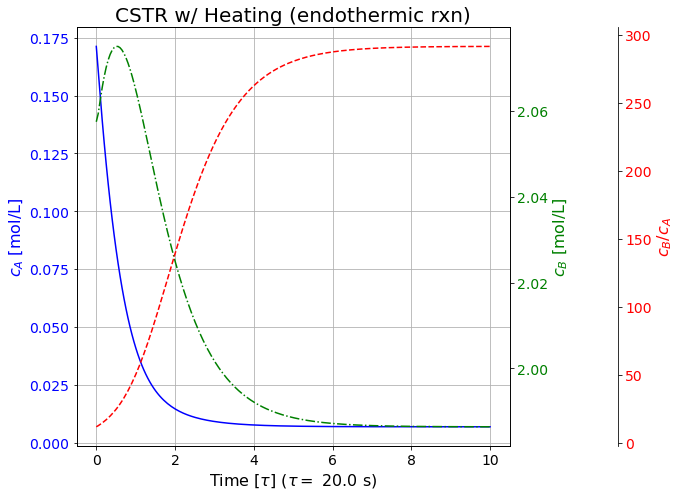

In [12]:
'''Plot Concentration versus Time'''

import matplotlib.pyplot as plt
    
(fig, ax1) = plt.subplots(1, figsize=(10, 7))

ax1.plot(time_stamps/tau, u_vec_history[:,0],'b-',label='$T_{in}=$ '+str(params['temp_in']) )

ax1.set_xlabel(r'Time [$\tau$] ($\tau=$%5.1f s)'%tau,fontsize=16)
ax1.set_ylabel(r'$c_A$ [mol/L]',fontsize=16,color='blue')
ax1.tick_params(axis='y', labelcolor='blue', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)
#ax1.legend(loc='best',fontsize=12)
#ax1.set_ylim(0,1)
ax1.grid(True)

# create a twin x axis to be shared
ax2 = ax1.twinx() 

ax2.plot(time_stamps/tau , u_vec_history[:,1],'g-.',label='$T_{in}=$ '+str(params['temp_in']))

ax2.set_ylabel(r'$c_B$ [mol/L]',fontsize=16,color='green')
ax2.tick_params(axis='y', labelcolor='green', labelsize=14)
#ax2.legend(loc='best',fontsize=12)
#ax2.set_ylim(0,2)
#ax2.grid(True)

ax3 = ax1.twinx() 
ax3.plot(time_stamps/tau, u_vec_history[:,1]/u_vec_history[:,0],'--',color='red',label='$T_{in}=$ '+str(params['temp_in']) )
ax3.set_ylabel(r'$c_B/c_A$',fontsize=16,color='red')
ax3.tick_params(axis='y', labelcolor='red', labelsize=14)
#ax3.legend(loc='best',fontsize=14)
#ax2.grid(True)
ax3.spines["right"].set_position(("axes", 1.25))

plt.title('CSTR w/ Heating (endothermic rxn)',fontsize=20)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
print('')

With the switch to new inflow conditions, *i.e* lower $c_{A_\text{in}}$ and higher $T_\text{in}$ relative the the steady state condition, A is consumed immediately and drops to a new lower value in about 8$\,\tau$. The concentration of B has an initial peak and at steady state is reduced as compared to the initial value.

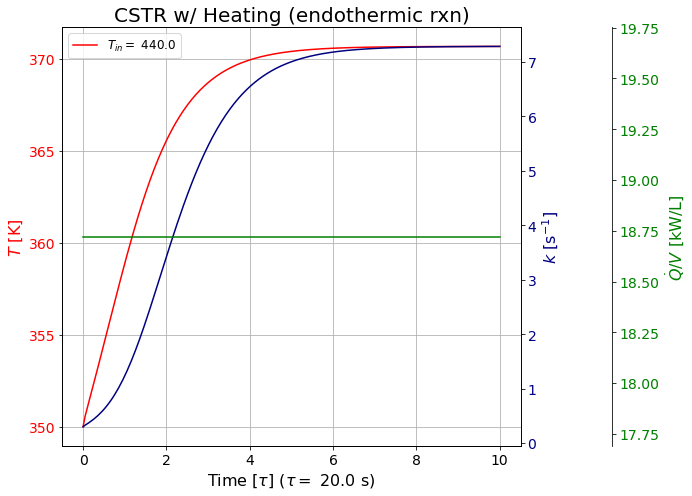

In [13]:
import matplotlib.pyplot as plt
    
(fig, ax1) = plt.subplots(1, figsize=(10, 7))

ax1.plot(time_stamps/tau,u_vec_history[:,2],'r-',label='$T_{in}=$ '+str(params['temp_in']) )

ax1.set_xlabel(r'Time [$\tau$] ($\tau=$%5.1f s)'%tau,fontsize=16)
ax1.set_ylabel(r'$T$ [K]',fontsize=16,color='red')
ax1.tick_params(axis='y', labelcolor='red', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)
ax1.legend(loc='upper left',fontsize=12)
ax1.grid(True)

ax2 = ax1.twinx() 
k_cte = params['k_0']*np.exp(-params['energy_a_over_r']/u_vec_history[:,2])
ax2.plot(time_stamps/tau,k_cte,'-',color='navy',label='$T_{in}=$ '+str(params['temp_in']) )
ax2.set_ylabel(r'$k$ [s$^{-1}$]',fontsize=16,color='navy')
ax2.tick_params(axis='y', labelcolor='navy', labelsize=14)
#ax2.legend(loc='best',fontsize=14)
#ax2.grid(True)

ax3 = ax1.twinx() 
ax3.plot(time_stamps/tau, q_heat_power_dens_ss/1000/1000*np.ones(time_stamps.size),'-',color='green',label='$T_{in}=$ '+str(params['temp_in']) )
ax3.set_ylabel(r'$\dot{Q}/V$ [kW/L]',fontsize=16,color='green')
ax3.tick_params(axis='y', labelcolor='green', labelsize=14)
#ax3.legend(loc='best',fontsize=14)
#ax2.grid(True)
ax3.spines["right"].set_position(("axes", 1.2))

plt.title('CSTR w/ Heating (endothermic rxn)',fontsize=20)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
print('')

The temperature of the reactor rises to a new higher value but lower than the inflow temperature because of the endothermic reaction taking place.

## [Final Comments](#toc)<a id="fc"></a>
After the change in feed conditions the reactor reaches another steady state after 160 seconds as shown in the table and plots above.

<span style="color:red">
If the cost of electricity is US $\$$0.3/kWh, to run this chemical reactor for 160 seconds will cost: US $50.
</span>

In [14]:
import plotly.offline as py # check plotly website
py.init_notebook_mode()
import plotly.graph_objs as go

from ipywidgets import interact # ipython notebook

layout = go.Layout(title="CSTR w/ Heating (endothermic rxn)", 
                   xaxis={'title':'Time [min]'}, 
                   yaxis=dict(side='left',title='HELLO'), 
                   yaxis2=dict(overlaying='y',anchor='x',side='right',title='HELLO')
                  )

fig = go.FigureWidget(layout=layout)

scatt = fig.add_scatter()

fig.layout.titlefont.size = 22
fig.layout.titlefont.family = 'Rockwell'
fig.layout.xaxis.title = 'Time [tau]'
fig.layout.yaxis.title = 'c_A [kgmol/L]'
fig.layout.yaxis2.title = 'T [K]'

ModuleNotFoundError: No module named 'plotly'

## [Interactive Results](#toc) <a id="ires"></a>

In [ ]:
'''Create interactive plot'''

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import subplots

fig = go.FigureWidget()
fig = subplots.make_subplots(rows=3, cols=1, print_grid=False)

layout = go.Layout(title='CSTR w/ Heating (endothermic rxn)', 
         xaxis={'title':'Time [min]'}, 
         yaxis=dict(side='left',title='$\\text{NO}_2 [\\mu \\text{g}/ \\text{m}^3]$',anchor='x'),
         xaxis2={'title':'Time [min]'}, 
         yaxis2=dict(side='left',title='$\\text{NO}_2 [\\mu \\text{g}/ \\text{m}^3]$',anchor='x2'),
         xaxis3={'title':'Time [min]'}, 
         yaxis3=dict(side='left',title='$\\text{Power} [\\mu \\text{g}/ \\text{m}^3]$',anchor='x3')
                )

fig.layout.titlefont.size = 22
fig.layout.titlefont.family = 'Rockwell'

In [ ]:
'''Vary inflow temperature and molarity of A'''

@interact(inflow_T=(400.0, 450.0, 1.0), inflow_A=(0.7, 1.5, 0.05), 
          select=['Temperature', 'Molarity_A', 'Molarity_B', 'All'])
def update(inflow_T=425.0, inflow_A=1.2, select='Molarity_A'):
    with fig.batch_update():
        #scatt.x=time_stamps/tau
        params['c_a_in']  = inflow_A
        params['temp_in'] = inflow_T
        
        history = run_cstr(f_vec, time_stamps, params)
        
        def plot_molarity_a(fig):
            if row==1:
                xaxis = 'xaxis'
                yaxis = 'yaxis'
            elif row==2:
                xaxis = 'xaxis2'
                yaxis = 'yaxis2'
            else:
                assert False, 'not available.'
        
        if select == 'Molarity_A':
            scatt_xaxis='x'
            scatt_yaxis='y'
            fig.add_scatter(name='Molarity A',mode='lines',
                            x=time_stamps/tau, y=history[:,0],
                            xaxis=scatt_xaxis , yaxis=scatt_yaxis,
                            line=dict(color='blue'))
            #scatt.y=history[:,0]
            #scatt.line.color='blue'
            fig.layout.yaxis.title = 'c_A [mol/L]'
        elif select == 'Molarity_B':
            scatt_xaxis='x'
            scatt_yaxis='y'
            fig.add_scatter(name='Molarity B',mode='lines',
                            x=time_stamps/tau, y=history[:,1],
                            xaxis=scatt_xaxis , yaxis=scatt_yaxis,
                            line=dict(color='green'))
            #scatt.y=history[:,1]
            #scatt.line.color='green'
            fig.layout.yaxis.title = 'c_B [mol/L]'
        else:
            scatt_xaxis='x'
            scatt_yaxis='y'
            fig.add_scatter(name='Temperature',mode='lines',
                            x=time_stamps/tau, y=history[:,2],
                            xaxis=scatt_xaxis , yaxis=scatt_yaxis,
                            line=dict(color='red'))
            #scatt.y=history[:,2]
            #scatt.line.color='red'
            fig.layout.yaxis.title = 'T [K]'

fig